# Problema 0: Sucesiones recursivas y errores de truncamiento

Cálculo de cifras decimales de $\pi$ mediante la Fórmula de Viète (producto infinito publicado en 1593 por François Viète):
\begin{equation*}
    \frac{2}{\pi}  = \prod_{k\to\infty} \frac{a_k}2, \qquad\text{donde }\quad
        a_1 = \sqrt{2}, \quad a_{k+1} = \sqrt{2+a_k}.
\end{equation*}

In [1]:
from __future__ import division, print_function # Sólo para Python 2

# Importar todo numpy y matplotlib en el espacio de nombres actual (desaconsejado
# en "proyectos serios")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def aprox_viete(n):
    a = [sqrt(2)]
    for k in range(n):
        a.append(sqrt(2+a[k]))
    p = product( array(a)/2.0 )
    return (2.0/p)

lista_viete = []
n = 15
for k in range(n):
    lista_viete.append( aprox_viete(k) )

# Lo definimos de otra forma: { aprox_viete(k) / k\in {0,...,n-1} }
lista_viete = [ aprox_viete(k) for k in range(n) ]
# Errores absolutos

errores_abs = abs( array(lista_viete) - pi )
print("Errores absolutos:", errores_abs)

Errores absolutos: [  3.13165529e-01   8.01251947e-02   2.01475013e-02   5.04416304e-03
   1.26149664e-03   3.15402657e-04   7.88524455e-05   1.97132227e-05
   4.92831263e-06   1.23207859e-06   3.08019676e-07   7.70049211e-08
   1.92512304e-08   4.81280793e-09   1.20320243e-09]


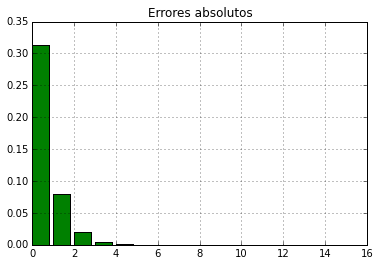

In [3]:
x = range(n)
y = errores_abs
bar(x,y,color="green")
grid()
title("Errores absolutos")

### Análisis del lograritmo de los errores

<Container object of 15 artists>

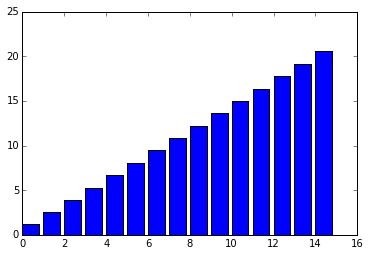

In [4]:
# Los errores en la gráfica anterior parecen decrecer exponencialmente. 
# En efecto, si tomamos logaritmo decrecen de forma lineal:
errores_log = abs(log(errores_abs))
bar(range(n), errores_log)

In [5]:
import pandas # Python Data Analyisis Library, http://pandas.pydata.org
datos = array([lista_viete,errores_abs, errores_log]) # Array 2 x n
datos = datos.transpose() # Array n x 2 (2 columnas de datos)
df = pandas.DataFrame(datos, columns=[r"$\approx\pi$", r"$e_k$", r"$\log e_k$"]) # r" = raw string"
df

,$\approx\pi$,$e_k$,$\log e_k$
0,2.828427,3.131655e-01,1.161023
1,3.061467,8.012519e-02,2.524165
2,3.121445,2.014750e-02,3.904675
3,3.136548,5.044163e-03,5.289524
4,3.140331,1.261497e-03,6.675456
5,3.141277,3.154027e-04,8.061660
6,3.141514,7.885245e-05,9.447932
7,3.141573,1.971322e-05,10.834221
8,3.141588,4.928313e-06,12.220514
9,3.141591,1.232079e-06,13.606808
